In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("titanic.csv")
data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
data=data.drop(["PassengerId","Name","Ticket","Cabin",'Embarked',"Fare"],axis=1)

In [6]:
data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Survived      int64
dtype: object

In [7]:
lc=LabelEncoder()
data["Sex"]=lc.fit_transform(data["Sex"])

In [8]:
data.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Survived      0
dtype: int64

In [9]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [10]:
x=data.drop("Survived",axis=1)
y=data.Survived

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [12]:
xgb=XGBClassifier( learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 100)
xgb.fit(x_train,y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [13]:
xgb.score(x_test,y_test)

0.7988826815642458

In [14]:
y_pred=xgb.predict(x_test)

In [15]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[102,  13],
       [ 23,  41]], dtype=int64)

<Figure size 2000x700 with 0 Axes>

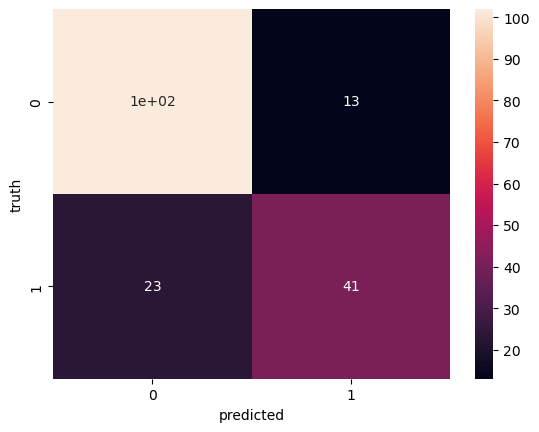

<Figure size 2000x700 with 0 Axes>

In [16]:
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.figure(figsize=(20,7))